In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
import matplotlib.pyplot as plt

In [4]:
statevector_sim = Aer.get_backend("statevector_simulator")

# Berstein-Vazirani algorithm

## Oracle
$$f(x) = s_0 x_0 \oplus s_1 x_1 \oplus s_2 x_2 \oplus \cdots \oplus s_{n - 1} x_{n-1} $$

$$U_f |x\rangle = (-1)^{f(x)} |x \rangle$$

Goal is to implement the unitary $U_f$ on our quantum register. We have to decompose $U$ into a product of simple gates (X, H, CX in this case).

$$X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$$

$$H = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$$

$$CX |n\rangle | m\rangle = |n\rangle | n \oplus m \rangle $$

$$|0\rangle = \begin{pmatrix} 1 \\ 0\end{pmatrix}, \ \ \  |1\rangle = \begin{pmatrix} 0 \\ 1\end{pmatrix}$$

Usually implemented using an ancilla qubit by setting the ancilla state to $\frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right)$ and applying the transformation $|a\rangle |x\rangle \rightarrow |a \oplus f(x)\rangle |x\rangle$.

## Task 1

Create a quantum circuit which transforms $|0\rangle$ into the state $\frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right)$

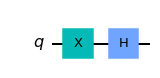

In [5]:
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)
qc.draw("mpl")

## Task 2
Simulate the previous circuit using a state vector simulator and check the result.

In [6]:
job = execute(qc, backend = statevector_sim)

In [7]:
job.result().get_statevector()

Statevector([ 0.70710678+0.00000000e+00j, -0.70710678-8.65956056e-17j],
            dims=(2,))


## Task 3
Create a quantum circuit which implements addition modolu 2. $|x\rangle |y\rangle \rightarrow |x\rangle |x \oplus y \rangle$

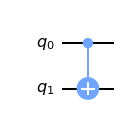

In [8]:
qc = QuantumCircuit(2)
qc.cx(0, 1)
qc.draw("mpl")

## Task 4

Create a quantum circuit which implements the B-V oracle for a random function $f$.

In [3]:
def BV_oracle(s):
    n = len(s) #number of logical qubits
    qc = QuantumCircuit(n + 1)
    qc.x(n)
    qc.h(n)
    for i, c in enumerate(s):
        if c == 1:
            qc.cx(i, n)
    return qc

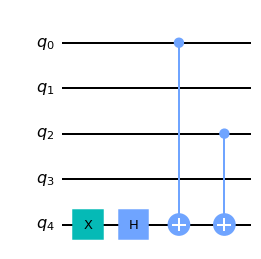

In [4]:
n = 4
random_string = np.random.choice([0, 1], n)
oracle = BV_oracle(random_string)
oracle.draw("mpl")

## Task 5

Create a quantum circuit which implements the complete B-V algorithm.

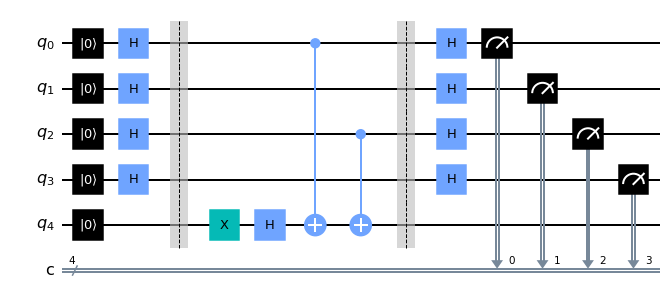

In [5]:
qc = QuantumCircuit(n + 1, n)
qc.reset(range(n + 1))
qc.h(range(n))
qc.barrier(range(n + 1))
qc.compose(oracle, inplace = True)
qc.barrier(range(n + 1))
qc.h(range(n))
qc.measure(range(n), range(n))
qc.draw("mpl")

## Task 6

Simulate the B-V algorithm and determine the random string behind the function $f$.

In [12]:
job = execute(qc, backend = statevector_sim)

In [13]:
job.result().get_counts()

{'1011': 1}

In [14]:
random_string[::-1]

array([1, 0, 1, 1])

## Running the algorithm on real hardware

In [6]:
real_backend = provider.get_backend("ibmq_manila")

In [8]:
#job = execute(qc, backend = real_backend, shots = 2048)
job = real_backend.retrieve_job("63721d7b0565be38f60081ee")

In [10]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [11]:
counts = job.result().get_counts()

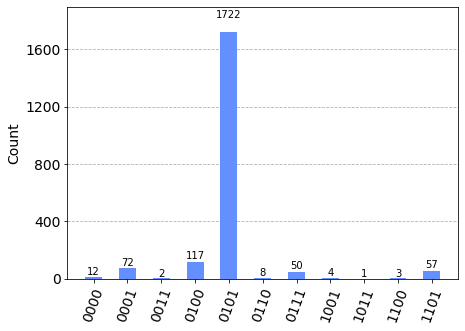

In [12]:
plot_histogram(counts)